In [47]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import os
import numpy as np

In [48]:
%%capture
!pip install -r requirements.txt
!python -m nltk.downloader stopwords
!python -m nltk.downloader wordnet
!python -m nltk.downloader omw-1.4


In [49]:
coins = ['BNB', 'XRP', 'BCHABC', 'LTC', 'LINK', 'ETC', 'TRX', 'EOS', 'XLM', 'ADA', 'BCH', 'QTUM', 'VET', 'EUR', 'BULL', 'BEAR', 'ETHBULL', 'ETHBEAR', 'ICX', 'BTS', 'BNT', 'ATOM', 'DASH', 'NEO', 'WAVES', 'XTZ', 'EOSBULL', 'EOSBEAR', 'XRPBULL', 'XRPBEAR', 'BAT', 'ENJ', 'NANO', 'ONT', 'RVN', 'STRAT', 'AION', 'ALGO', 'BTT', 'TOMO', 'XMR', 'ZEC', 'BNBBULL', 'BNBBEAR', 'DATA', 'SOL', 'CTSI', 'ERD', 'HBAR', 'MATIC', 'WRX', 'ZIL', 'KNC', 'REP', 'LRC', 'IQ', 'GBP', 'DGB', 'COMP', 'BKRW', 'SXP', 'SNX', 'VTHO', 'DCR', 'STORJ', 'IRIS', 'MKR', 'DAI', 'RUNE', 'MANA', 'DOGE', 'LEND', 'ZRX', 'AUD', 'FIO', 'AVA', 'IOTA', 'BAL', 'YFI', 'BLZ', 'KMD', 'JST', 'SRM', 'ANT', 'CRV', 'SAND', 'OCEAN', 'NMR', 'DOT', 'LUNA', 'IDEX', 'RSR', 'PAXG', 'WNXM', 'TRB', 'BZRX', 'SUSHI', 'YFII', 'KSM', 'EGLD', 'DIA', 'BEL', 'SWRV', 'WING', 'CREAM', 'UNI', 'AVAX', 'FLM', 'CAKE', 'XVS', 'ALPHA', 'VIDT', 'AAVE', 'NEAR', 'FIL', 'INJ', 'AERGO', 'ONE', 'AUDIO', 'CTK', 'BOT', 'KP3R', 'AXS', 'HARD', 'DNT', 'CVP', 'STRAX', 'FOR', 'UNFI', 'FRONT', 'BCHA', 'ROSE', 'SYS', 'HEGIC', 'PROM', 'SKL', 'COVER', 'GHST', 'DF', 'JUV', 'PSG', 'BTCST', 'TRU', 'DEXE', 'USDC', 'TUSD', 'PAX', 'CKB', 'TWT', 'LIT', 'SFP', 'FXS', 'DODO', 'BAKE', 'UFT', '1INCH', 'BAND', 'GRT', 'IOST', 'OMG', 'REEF', 'ACM', 'AUCTION', 'PHA', 'TVK', 'BADGER', 'FIS', 'OM', 'POND', 'DEGO', 'ALICE', 'CHZ', 'BIFI', 'LINA', 'PERP', 'RAMP', 'SUPER', 'CFX', 'XVG', 'EPS', 'AUTO', 'TKO', 'TLM', 'BTG', 'HOT', 'MIR', 'BAR', 'FORTH', 'BURGER', 'SLP', 'SHIB', 'ICP', 'AR', 'POLS', 'MDX', 'MASK', 'LPT', 'NU', 'RLC', 'CELR', 'ATM', 'ZEN', 'FTM', 'THETA', 'WIN', 'KAVA', 'XEM', 'ATA', 'GTC', 'TORN', 'COTI', 'KEEP', 'SC', 'CHR', 'STMX', 'HNT', 'FTT', 'DOCK', 'ERN', 'KLAY', 'UTK', 'IOTX', 'BOND', 'MLN', 'LTO', 'ADX', 'QUICK', 'C98', 'CLV', 'QNT', 'FLOW', 'XEC', 'MINA', 'RAY', 'FARM', 'ALPACA', 'ORN', 'MBOX', 'WAXP', 'TRIBE', 'GNO', 'MTL', 'OGN', 'POLY', 'DYDX', 'ELF', 'USDP', 'GALA', 'SUN', 'ILV', 'REN', 'YGG', 'STX', 'FET', 'ARPA', 'LSK', 'FIDA', 'DENT', 'AGLD', 'RAD', 'HIVE', 'STPT', 'BETA', 'RARE', 'TROY', 'CHESS', 'SCRT', 'CELO', 'DAR', 'BNX', 'RGT', 'LAZIO', 'OXT', 'MOVR', 'CITY', 'ENS', 'ANKR', 'QI', 'POWR', 'JASMY', 'AMP', 'PLA', 'PYR', 'RNDR', 'ALCX', 'MC', 'COCOS', 'ANY', 'BICO', 'FLUX', 'REQ', 'VOXEL', 'COS', 'CTXC', 'HIGH', 'CVX', 'PEOPLE', 'OOKI', 'MDT', 'NULS', 'SPELL', 'UST', 'JOE', 'DUSK', 'ACH', 'IMX', 'GLMR', 'UMA', 'LOKA', 'API3', 'ACA', 'ANC', 'XNO', 'WOO', 'TFUEL', 'ASTR', 'GMT', 'KDA', 'APE', 'ALPINE', 'BSW', 'SANTOS', 'MULTI', 'PORTO', 'BTTC', 'MBL', 'MOB', 'NEXO', 'GAL', 'LDO', 'EPX', 'STEEM', 'CVC', 'REI', 'DREP', 'AKRO', 'PUNDIX', 'LUNC', 'USTC', 'OP', 'OG', 'KEY', 'ASR', 'FIRO', 'NKN', 'GTO', 'WBTC', 'LEVER', 'GLM', 'SSV', 'STG', 'ARK', 'BETH', 'LOOM', 'SNM', 'AMB', 'PHB', 'GAS', 'NEBL', 'PROS', 'VIB', 'GMX', 'AGIX', 'SNT', 'POLYX', 'APT', 'QKC', 'OSMO']
groups  =['Altsignals', 'coincodecap', 'Wolfxsignals', 'MikeTopCryptoSignals', 'Universalcryptosignals', 'CryptosignalsOrg', 'CryptoClassicsVIP', 'CRYPTONOTESMOHSIN', 'RocketWllet_Official', 'fatpigsignals', 'onwardbtc_official', 'defimillion', 'Mega_Cryptoo', 'binancekillers', 'whalesguide', 'FedRussianInsiders', 'Official_Bulls', 'TCGFORYOU', 'UltimateCryptoSignals', 'wallstreetTraderSchool', 'coin_signals', 'cryptopapasignals', 'MCP_binance', 'altcenter', 'verifiedcryptonews', 'AlphaTradeZone', 'cryptosignal', 'marginwhales', 'indoleaks', 'bestbinancepumps', 'big_pumps_signals', 'godx_signals', 'cryptopumpsignals_1', 'cryptovipsignalta', 'Thebull_crypto']

In [50]:
import snscrape.modules.telegram as telegram
import pandas as pd

tweets_list = []
for i in groups:
    for x,tel in enumerate(telegram.TelegramChannelScraper(i).get_items()):
        if str(tel.date).split()[0]<'2022-10-10':
            break
        tweets_list.append([i,tel.date, tel.content])
    

No public post list for this user
No public post list for this user


In [51]:
tel_df = pd.DataFrame(tweets_list, columns=['Name','Datetime','Text'])

In [52]:
tel_df['Datetime'] = tel_df['Datetime'].apply(lambda a: pd.to_datetime(a).date())

In [53]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
# current_date =date.today()
def text_cleaning(text):
    stop_free = ' '.join([word for word in str(text).split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

tel_df["Cleaned Text"]= tel_df["Text"].apply(text_cleaning)

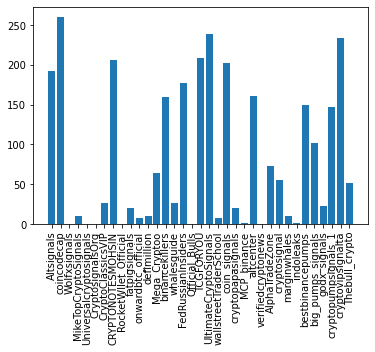

In [54]:
import pandas as pd
from matplotlib import pyplot as plt
count = list()
names = list()
for group in groups:
    names.append(group)
    count.append(len(tel_df[tel_df['Name']==group]))
plt.bar(names,count)
plt.xticks(rotation=90)
plt.show()

Before Filter 1

In [55]:
def extractor(i):
    i = str(i)
    suffixes = 'usdt|busd|futures'
    coinsregex = '|'.join(coins)
    found = False
    text = re.sub(r'[^\w\s]', ' ', i)
    for s in text.split():
        print(s)
        if re.search("({})({})+|({})+({})|^({})$|[0-9]+({})|({})[0-9]+".format(coinsregex,suffixes,suffixes,coinsregex,coinsregex,coinsregex,coinsregex), s,re.IGNORECASE):
            found = True
            break
    if(found):
        return i
    else: return np.nan
tel_df['Cleaned Text'] = tel_df['Cleaned Text'].apply(extractor)
tel_df_fil1 = tel_df[tel_df['Cleaned Text'].notna()] 

FTX
filed
chapter
11
bankruptcy
FAST
profit
Binance
Futures
ByBit
USDTBTCUSDT
All
takeprofit
target
achieved
Profit
3000083
Period
12
Minutes
ByBit
USDTSOLUSDT
USDTSOLUSDT
ByBit
USDT
Binance
FuturesSOLUSDT
FuturesSOLUSDT
Weve
updated
reversal
finder
The
CLUSTER
Its
brilliant
tool
find
reversal
ranging
market
SCALP
THEM
CLUSTER
package
contains
three
script
FREE
AltAlgo
user
You
JOIN
HERE
CPI
Data
Data
FTX
used
4
billion
including
customer
fund
keep
keep
The
last
v65
update
AltAlgo
brought
Market
Structure
Order
Blocks
AltAlgo
user
loved
look
easily
read
chart
Finding
important
market
level
fast
easy
JOIN
US
use
AltAlgo
daily
trading
even
market
falling
Tomorrow
0830
EST
see
CPI
Data
Data
None
With
LOVE
AltSignals
Honesty
Professional
Our
top
priority
get
maximal
customer
satisfaction
JOIN
VIP
CLUB
Zuckerberg
cut
11000
job
Facebook
owner
Meta
BTC
100x
VIP
HIGH
HIGH
UTYLISE
MARKET
VOLATILITY
JOIN
US
AND
MAKE
SOME
MONEY
ByBit
USDT
Binance
FuturesBTCUSDT
All
takeprofit
target
achieved
Prof

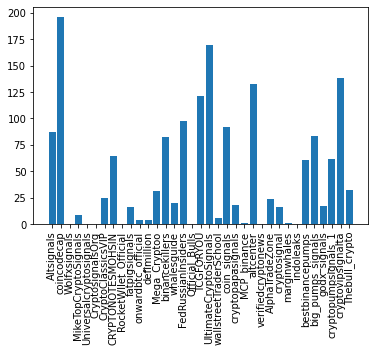

In [56]:
import pandas as pd
from matplotlib import pyplot as plt
count = list()
names = list()
for group in groups:
    names.append(group)
    count.append(len(tel_df_fil1[tel_df_fil1['Name']==group]))
plt.bar(names,count)
plt.xticks(rotation=90)
plt.show()

In [57]:
os.chdir("/workspace/FinalYear/Telegram_/")
if not os.path.exists('Channels'):
    os.mkdir('Channels')
os.chdir(os.path.join(os.getcwd(),'Channels'))
if not len(os.listdir()):
    for i in groups:
        tel_df[tel_df['Name']==i].to_csv(i+'.csv')